In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)

## Data Importing and Exploring

In [2]:
data = pd.read_csv('Expense.csv',na_values=' ?')

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       4680 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      4679 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  4902 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,38.6560,13.698292,17.0,28.0,37.0,48.0,90.0
education-num,5000.0,10.0650,2.558141,1.0,9.0,10.0,12.0,16.0
capital-gain,5000.0,1104.0800,7579.674371,0.0,0.0,0.0,0.0,99999.0
capital-loss,5000.0,90.0328,404.168991,0.0,0.0,0.0,0.0,3004.0
hours-per-week,5000.0,40.5662,12.154191,1.0,40.0,40.0,45.0,99.0


In [6]:
data.describe(include='object').T

,count,unique,top,freq
workclass,4680,8,Private,3444
education,5000,16,HS-grad,1602
marital-status,5000,7,Married-civ-spouse,2294
occupation,4679,14,Craft-repair,630
relationship,5000,6,Husband,2026
race,5000,5,White,4271
sex,5000,2,Male,3374
native-country,4902,39,United-States,4459
Expense,5000,2,<=50K,3776


In [7]:
data.isnull().sum()

age                 0
workclass         320
education           0
education-num       0
marital-status      0
occupation        321
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     98
Expense             0
dtype: int64

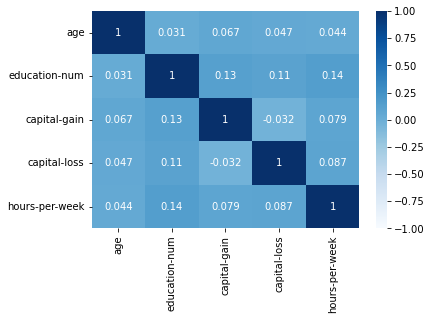

In [8]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='Blues')
plt.show()

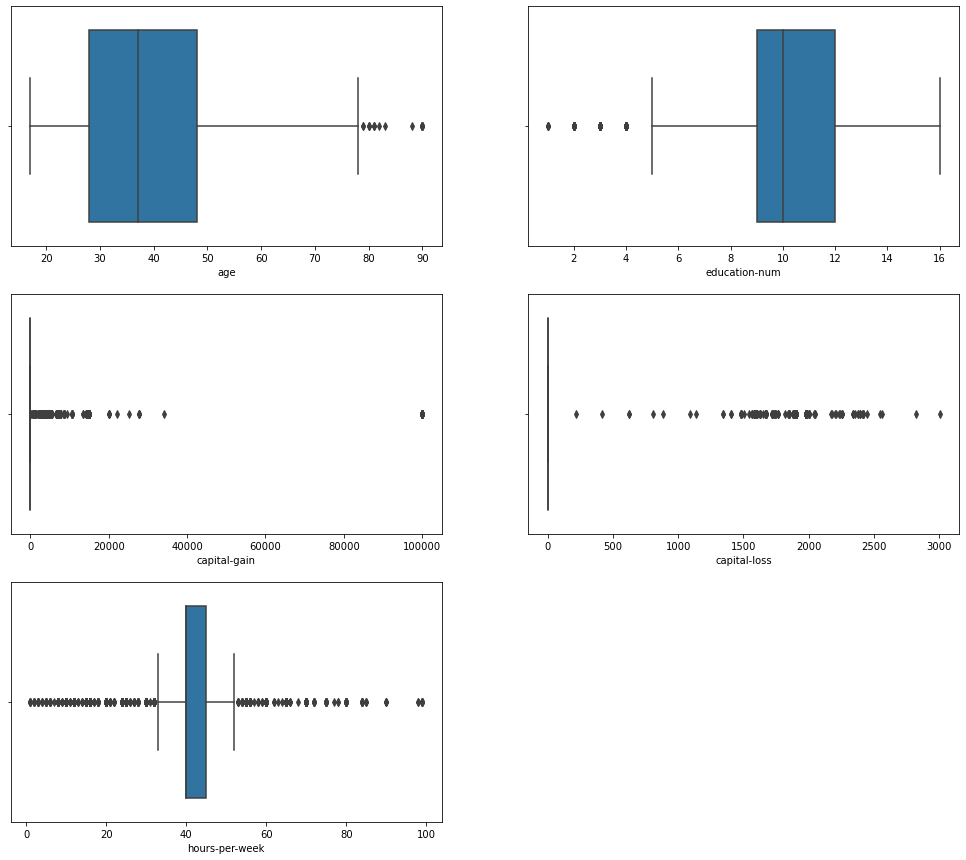

In [9]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    plt.subplot(3,2,t)
    sns.boxplot(data[i])
    t=t+1
plt.show()

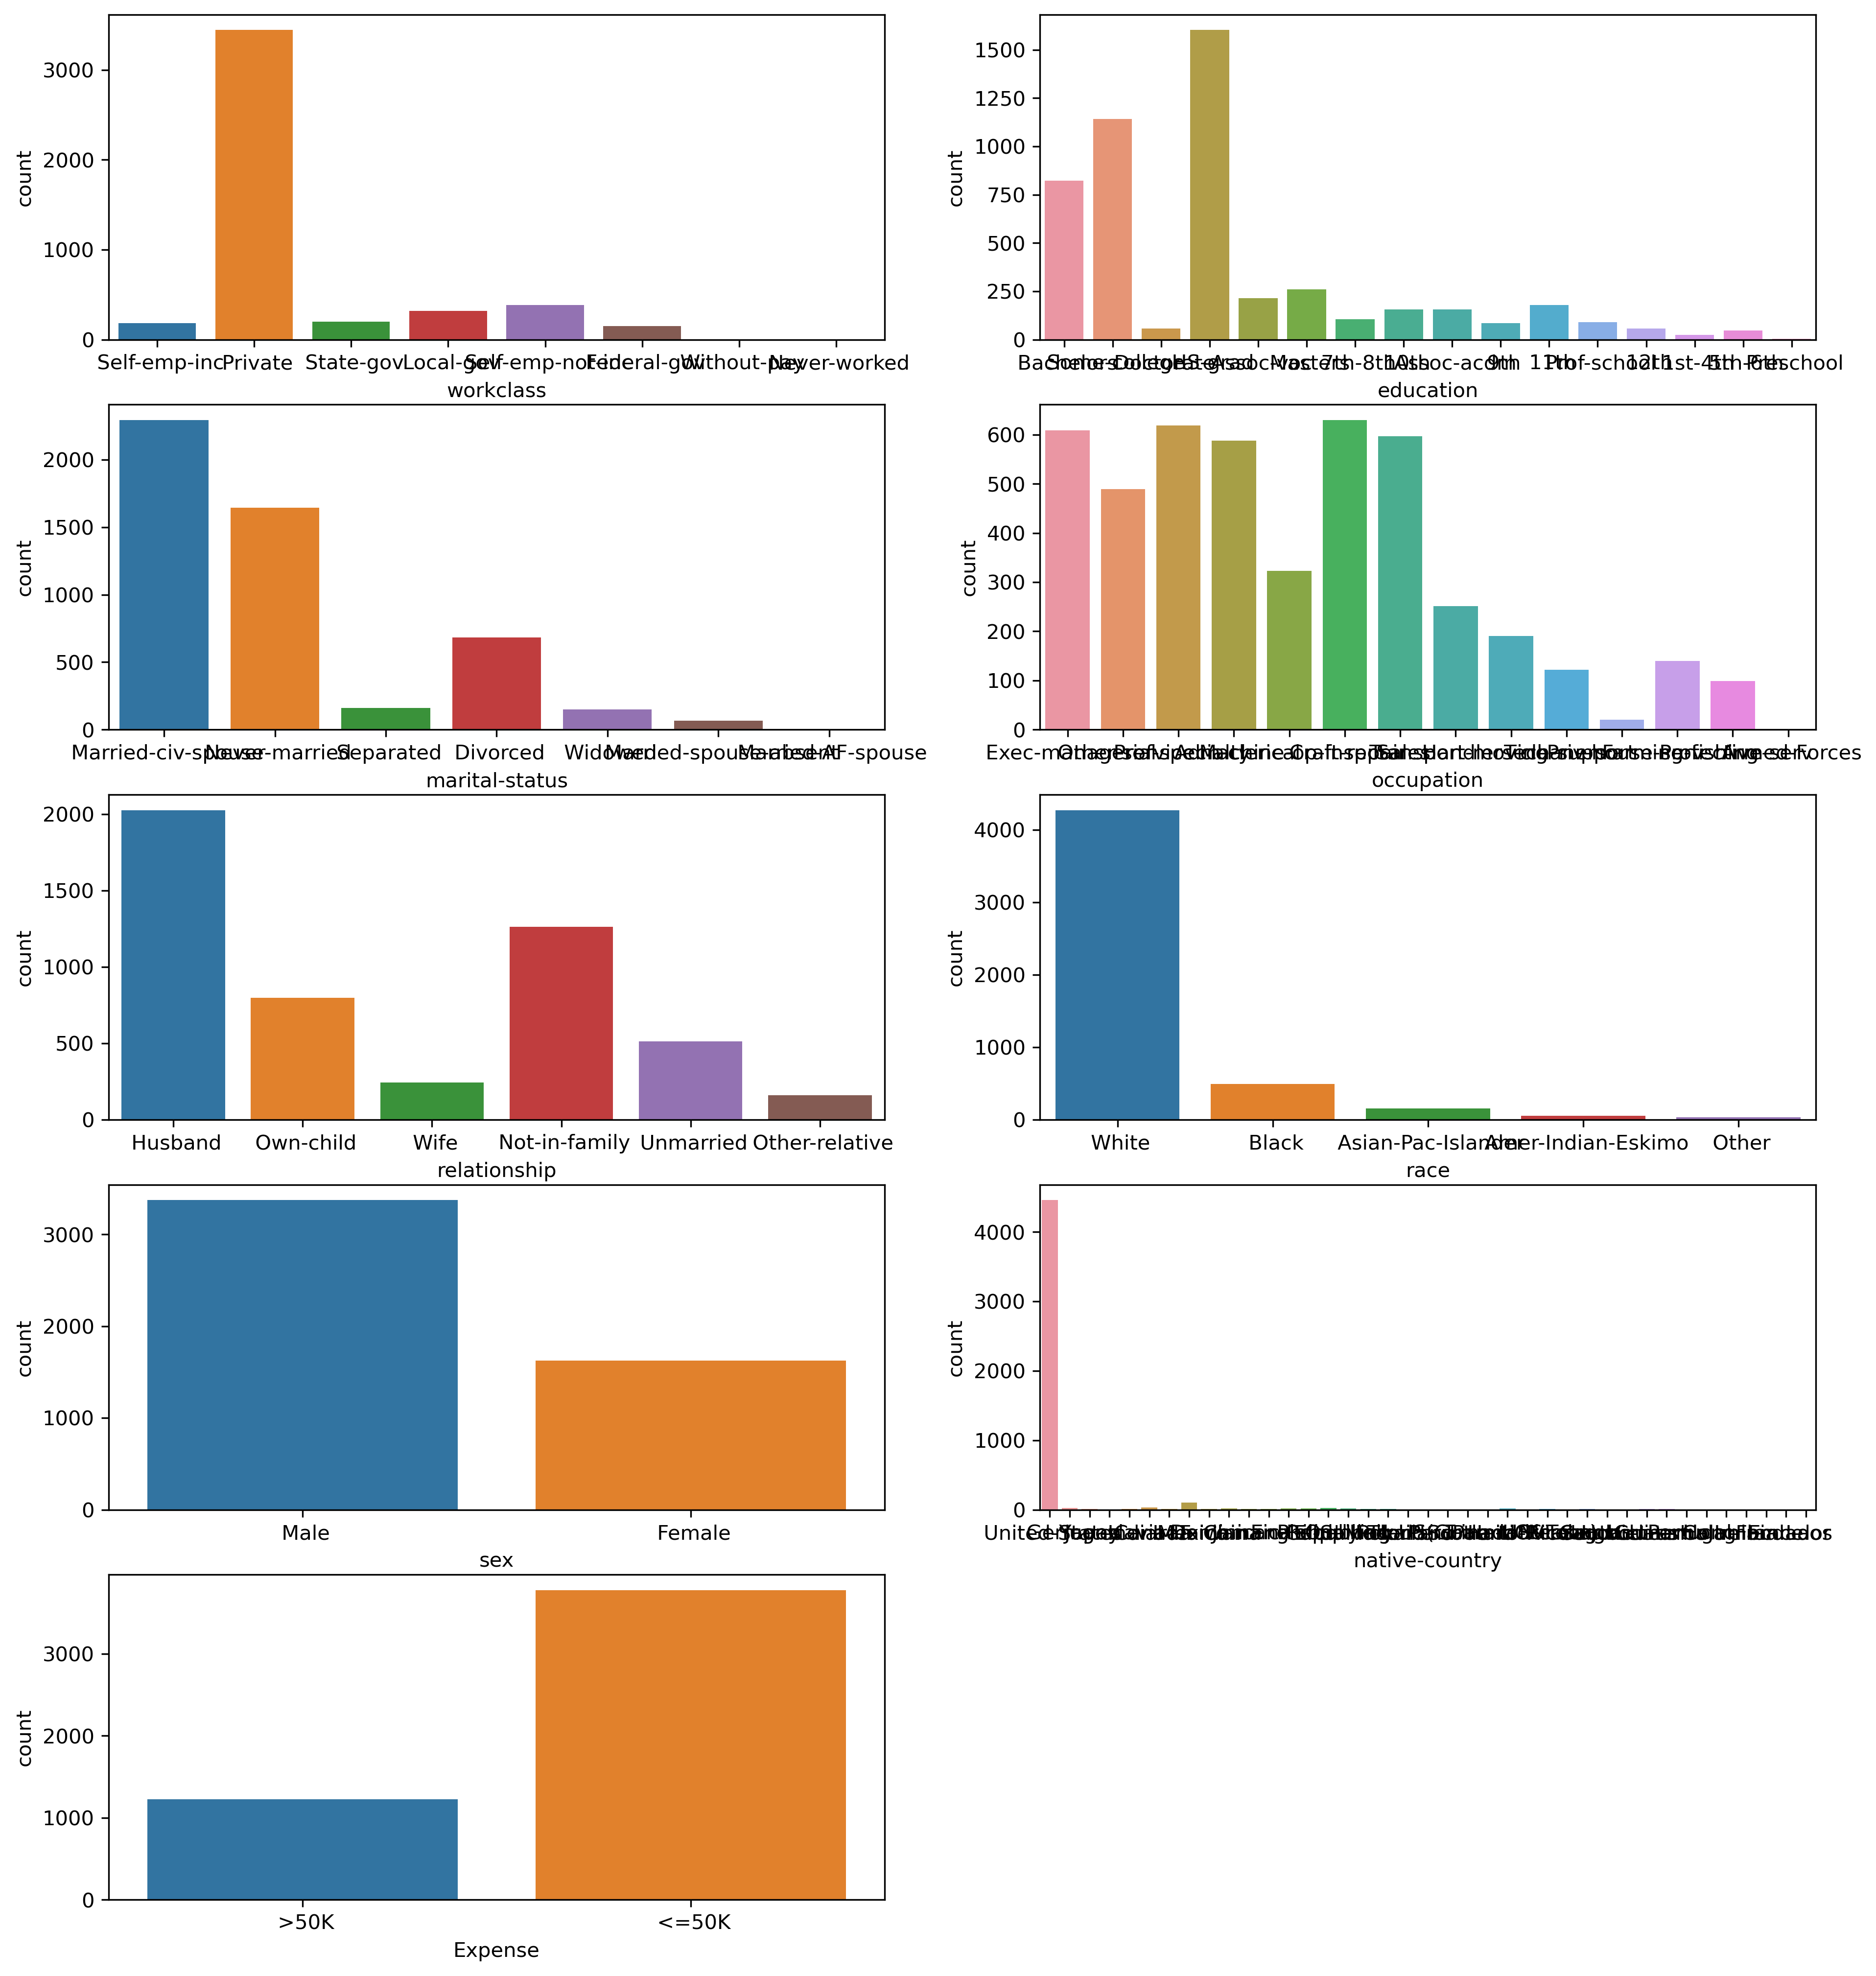

In [10]:
plt.figure(figsize=(15,17),dpi=300)
t=1
for i in data.select_dtypes(include='object').columns:
    plt.subplot(5,2,t)
    sns.countplot(data[i])
    t=t+1
plt.show()

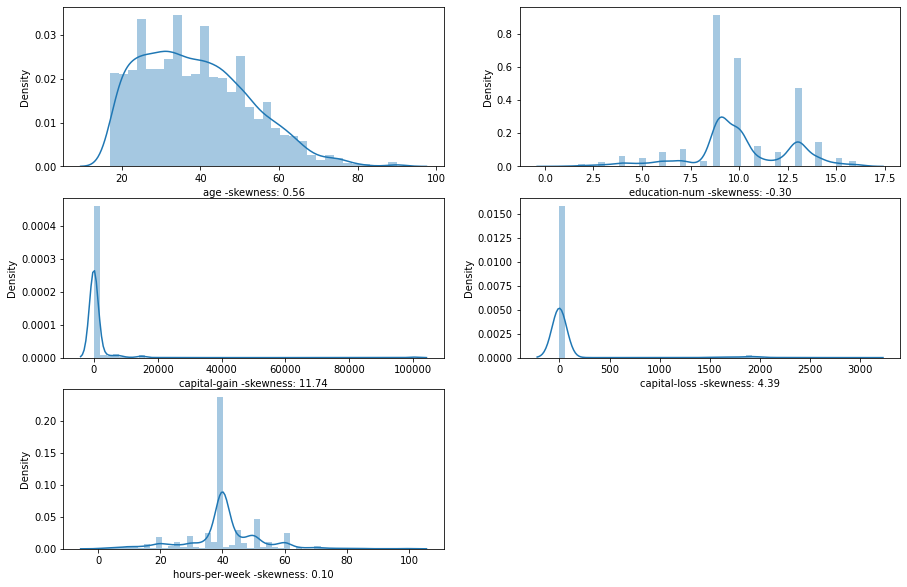

In [11]:
plt.figure(figsize=(15,17))
t=1
for i in data.select_dtypes(include=np.number).columns:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s -skewness: %.2f'%(i,data[i].skew()))
    t=t+1
plt.show()

## Missing value Treatment

In [12]:
edu_df = pd.DataFrame(data.groupby(by=['education-num','education'])['education'].count())

In [13]:
edu_df.sort_values(by=['education-num'])

,,education
education-num,education,
1,Preschool,5
2,1st-4th,25
3,5th-6th,46
4,7th-8th,105
5,9th,84
6,10th,156
7,11th,179
8,12th,57
9,HS-grad,1602


In [14]:
from scipy.stats import chi2_contingency

In [15]:
cont_table = pd.crosstab(data['workclass'],data['education-num'])

In [16]:
chi,p_value,dof,expected = chi2_contingency(cont_table)

In [17]:
if p_value>0.05:
    print('the two columns are independednt: Accept Ho')
else:
    print('the two columns are dependent: Accept Ha')

the two columns are dependent: Accept Ha


In [18]:
data[data['workclass'].isnull()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
20,19,NaN,HS-grad,9,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
35,76,NaN,7th-8th,4,Widowed,NaN,Not-in-family,White,Male,0,0,2,United-States,<=50K
36,19,NaN,HS-grad,9,Never-married,NaN,Unmarried,White,Male,0,2001,40,United-States,<=50K
40,34,NaN,11th,7,Married-civ-spouse,NaN,Wife,White,Female,0,0,8,United-States,<=50K
47,64,NaN,Assoc-acdm,12,Never-married,NaN,Not-in-family,White,Female,0,0,20,United-States,<=50K
98,19,NaN,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,<=50K
101,68,NaN,7th-8th,4,Married-civ-spouse,NaN,Husband,White,Male,0,0,8,United-States,<=50K
132,34,NaN,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
135,42,NaN,Some-college,10,Divorced,NaN,Unmarried,White,Male,0,0,40,United-States,<=50K
153,24,NaN,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K


In [19]:
data.groupby(by=['education','workclass'])['workclass'].count()

education      workclass        
 10th           Local-gov              4
                Never-worked           1
                Private              114
                Self-emp-inc           4
                Self-emp-not-inc      13
                State-gov              2
 11th           Federal-gov            2
                Local-gov              8
                Private              140
                Self-emp-inc           2
                Self-emp-not-inc       5
                State-gov              2
 12th           Federal-gov            1
                Local-gov              3
                Private               41
                Self-emp-not-inc       7
 1st-4th        Private               22
                Self-emp-not-inc       3
 5th-6th        Local-gov              1
                Private               39
                Self-emp-not-inc       2
 7th-8th        Federal-gov            1
                Local-gov              6
                Private 

In [20]:
data['workclass'].fillna('Private',inplace=True)

In [21]:
data.isnull().sum()

age                 0
workclass           0
education           0
education-num       0
marital-status      0
occupation        321
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     98
Expense             0
dtype: int64

In [22]:
data.groupby(by=['education','occupation'])['occupation'].count()

education      occupation        
 10th           Adm-clerical           7
                Craft-repair          31
                Exec-managerial        5
                Farming-fishing        7
                Handlers-cleaners      9
                Machine-op-inspct     19
                Other-service         19
                Priv-house-serv        2
                Prof-specialty         1
                Protective-serv        2
                Sales                 19
                Tech-support           1
                Transport-moving      15
 11th           Adm-clerical          11
                Craft-repair          28
                Exec-managerial        3
                Farming-fishing        5
                Handlers-cleaners     13
                Machine-op-inspct     18
                Other-service         38
                Priv-house-serv        1
                Prof-specialty         3
                Sales                 22
                Tech-su

In [23]:
for i in range(1,17):  
    data['occupation']= np.where(data['occupation'].isnull() & (data['education-num']==i),
                            data[data['education-num']==i]['occupation'].mode()[0],
                            data['occupation'])

In [24]:
data.isnull().sum()

age                0
workclass          0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country    98
Expense            0
dtype: int64

In [25]:
data['native-country'].fillna(data['native-country'].mode()[0],inplace=True)

In [26]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

## Outlier Treatment

In [27]:
# Outlier treatment- capping with UL and LL

for i in ['age','education-num','hours-per-week']:
    Q1,Q3 = np.quantile(data[i],[0.25,0.75])
    IQR = Q3-Q1
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR)

    data.loc[data[i]>UL,i]=UL
    data.loc[data[i]<LL,i]=LL

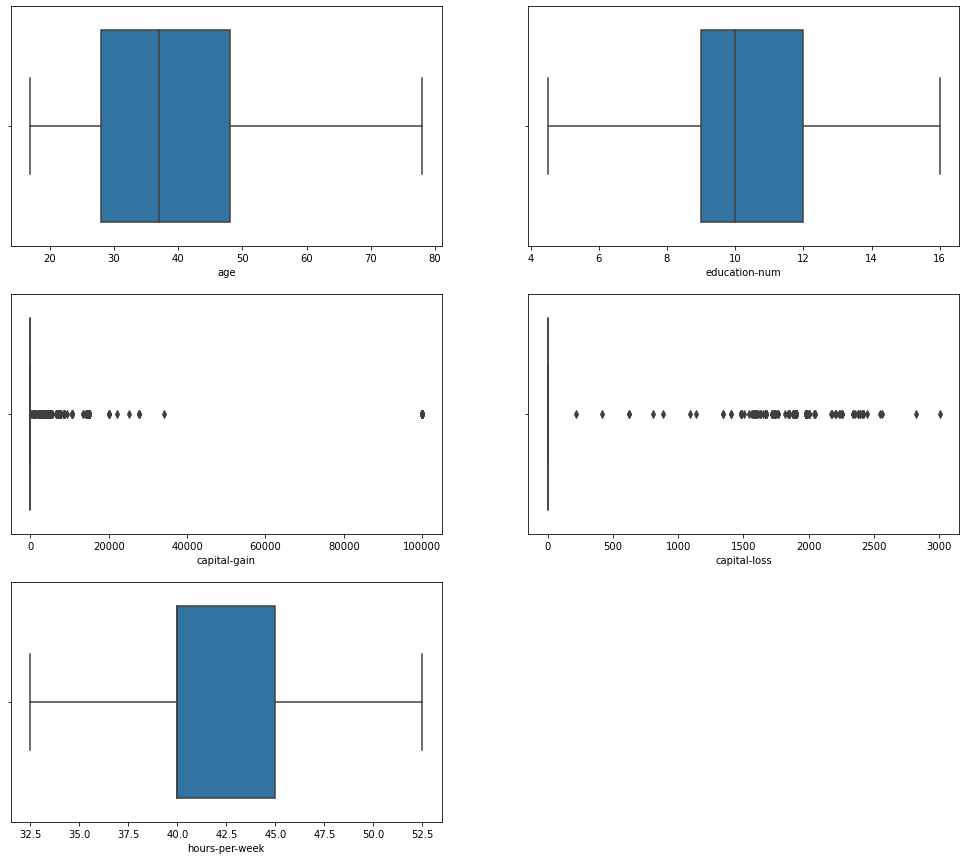

In [28]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    plt.subplot(3,2,t)
    sns.boxplot(data[i])
    t=t+1
plt.show()

In [29]:
data['capital-gain'] = np.where(data['capital-gain']>0,1,data['capital-gain'])
data['capital-loss'] = np.where(data['capital-loss']>0,1,data['capital-loss'])

In [30]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,0,50.0,United-States,>50K
1,20,Private,Some-college,10.0,Never-married,Other-service,Own-child,White,Male,0,0,40.0,United-States,<=50K
2,50,Private,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1,52.5,United-States,>50K
3,38,State-gov,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40.0,United-States,>50K
4,23,Local-gov,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Female,0,0,52.5,United-States,<=50K


## Categorical Column treatment

In [31]:
data['workclass'].value_counts().index

Index([' Private', ' Self-emp-not-inc', 'Private', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object')

In [32]:
def workclass(data):
    if data in [' Private','Private']:
        return 'Private'
    elif data in [' Self-emp-not-inc',' Self-emp-inc']:
        return 'Self-emp'
    elif data in [' Local-gov',' State-gov',' Federal-gov']:
        return 'Gov'
    else:
        return 'Others'

In [33]:
data['workclass']= data['workclass'].apply(workclass)

In [34]:
data['workclass'].value_counts()

Private     3764
Gov          665
Self-emp     569
Others         2
Name: workclass, dtype: int64

In [35]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,0,50.0,United-States,>50K
1,20,Private,Some-college,10.0,Never-married,Other-service,Own-child,White,Male,0,0,40.0,United-States,<=50K
2,50,Private,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1,52.5,United-States,>50K
3,38,Gov,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40.0,United-States,>50K
4,23,Gov,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Female,0,0,52.5,United-States,<=50K


In [36]:
del data['education']

In [37]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,0,50.0,United-States,>50K
1,20,Private,10.0,Never-married,Other-service,Own-child,White,Male,0,0,40.0,United-States,<=50K
2,50,Private,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1,52.5,United-States,>50K
3,38,Gov,9.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40.0,United-States,>50K
4,23,Gov,13.0,Never-married,Prof-specialty,Own-child,White,Female,0,0,52.5,United-States,<=50K


In [38]:
data['marital-status'].value_counts().index

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

In [39]:
def martial_status(data):
    if data in [' Married-civ-spouse',' Married-AF-spouse']:
        return 'Married'
    elif data in [' Divorced',' Separated']:
        return 'Divorced'
    elif data in [' Widowed',' Married-spouse-absent']:
        return 'Widowed'
    else:
        return 'Unmarried'

In [40]:
data['marital-status']= data['marital-status'].apply(martial_status)

In [41]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp,13.0,Married,Exec-managerial,Husband,White,Male,1,0,50.0,United-States,>50K
1,20,Private,10.0,Unmarried,Other-service,Own-child,White,Male,0,0,40.0,United-States,<=50K
2,50,Private,16.0,Married,Prof-specialty,Husband,White,Male,0,1,52.5,United-States,>50K
3,38,Gov,9.0,Married,Prof-specialty,Wife,White,Female,0,0,40.0,United-States,>50K
4,23,Gov,13.0,Unmarried,Prof-specialty,Own-child,White,Female,0,0,52.5,United-States,<=50K


In [42]:
data['occupation'].value_counts()

 Craft-repair         754
 Adm-clerical         709
 Prof-specialty       662
 Exec-managerial      609
 Sales                597
 Other-service        515
 Machine-op-inspct    330
 Transport-moving     251
 Handlers-cleaners    191
 Farming-fishing      140
 Tech-support         122
 Protective-serv       99
 Priv-house-serv       20
 Armed-Forces           1
Name: occupation, dtype: int64

In [43]:
frequency_map={}
for i in data['occupation'].value_counts().index:
    frequency_map[i] = data['occupation'].value_counts()[i]

In [44]:
frequency_map

{' Craft-repair': 754,
 ' Adm-clerical': 709,
 ' Prof-specialty': 662,
 ' Exec-managerial': 609,
 ' Sales': 597,
 ' Other-service': 515,
 ' Machine-op-inspct': 330,
 ' Transport-moving': 251,
 ' Handlers-cleaners': 191,
 ' Farming-fishing': 140,
 ' Tech-support': 122,
 ' Protective-serv': 99,
 ' Priv-house-serv': 20,
 ' Armed-Forces': 1}

In [45]:
data['occupation'] = data['occupation'].map(frequency_map)

In [46]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp,13.0,Married,609,Husband,White,Male,1,0,50.0,United-States,>50K
1,20,Private,10.0,Unmarried,515,Own-child,White,Male,0,0,40.0,United-States,<=50K
2,50,Private,16.0,Married,662,Husband,White,Male,0,1,52.5,United-States,>50K
3,38,Gov,9.0,Married,662,Wife,White,Female,0,0,40.0,United-States,>50K
4,23,Gov,13.0,Unmarried,662,Own-child,White,Female,0,0,52.5,United-States,<=50K


In [47]:
data['relationship'].value_counts()

 Husband           2026
 Not-in-family     1262
 Own-child          797
 Unmarried          512
 Wife               242
 Other-relative     161
Name: relationship, dtype: int64

In [48]:
data['race'].value_counts()

 White                 4271
 Black                  490
 Asian-Pac-Islander     153
 Amer-Indian-Eskimo      51
 Other                   35
Name: race, dtype: int64

In [49]:
def native(data):
    if data ==' United-States':
        return 'United States'
    else:
        return 'Others'

In [50]:
data['native-country']= data['native-country'].apply(native)

In [51]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp,13.0,Married,609,Husband,White,Male,1,0,50.0,United States,>50K
1,20,Private,10.0,Unmarried,515,Own-child,White,Male,0,0,40.0,United States,<=50K
2,50,Private,16.0,Married,662,Husband,White,Male,0,1,52.5,United States,>50K
3,38,Gov,9.0,Married,662,Wife,White,Female,0,0,40.0,United States,>50K
4,23,Gov,13.0,Unmarried,662,Own-child,White,Female,0,0,52.5,United States,<=50K


In [52]:
data['Expense']= data['Expense'].map({' <=50K':0,' >50K':1})

In [53]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp,13.0,Married,609,Husband,White,Male,1,0,50.0,United States,1
1,20,Private,10.0,Unmarried,515,Own-child,White,Male,0,0,40.0,United States,0
2,50,Private,16.0,Married,662,Husband,White,Male,0,1,52.5,United States,1
3,38,Gov,9.0,Married,662,Wife,White,Female,0,0,40.0,United States,1
4,23,Gov,13.0,Unmarried,662,Own-child,White,Female,0,0,52.5,United States,0


In [54]:
data.shape

(5000, 13)

## Train test Split

In [55]:
x = data.drop(columns=['Expense'])
y = data['Expense']

In [56]:
x = pd.get_dummies(x,drop_first=True)

In [57]:
x.shape

(5000, 23)

In [58]:
x.head()

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week,workclass_Others,workclass_Private,workclass_Self-emp,marital-status_Married,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_United States
0,39,13.0,609,1,0,50.0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1
1,20,10.0,515,0,0,40.0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,1
2,50,16.0,662,0,1,52.5,0,1,0,1,...,0,0,0,0,0,0,0,1,1,1
3,38,9.0,662,0,0,40.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,23,13.0,662,0,0,52.5,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,train_size=0.8,random_state=2)

In [61]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4000, 23), (1000, 23), (4000,), (1000,))

## BASE MODEL

In [62]:
import statsmodels.api as sm

In [63]:
model = sm.Logit(y_train,x_train).fit()

         Current function value: 0.357589
         Iterations: 35


C:\Users\Gaurav Siwal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                Expense   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3977
Method:                           MLE   Df Model:                           22
Date:                Sun, 14 Aug 2022   Pseudo R-squ.:                  0.3574
Time:                        21:03:04   Log-Likelihood:                -1430.4
converged:                      False   LL-Null:                       -2226.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                              0.0214      0.004      4.974      0.000       0.013       0.030
education-num                    0.3073      0.021     14.345      0.000     

In [65]:
model.aic

2906.7152686436225

In [66]:
y_pred_prob = model.predict(x_test)

In [67]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [68]:
y_pred[:5]

[0, 0, 0, 0, 1]

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,classification_report

In [70]:
def validation(test,pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy',accuracy_score(test,pred))
    print('Precison',precision_score(test,pred))
    print('Recall',recall_score(test,pred))
    print('F1 Score',f1_score(test,pred))
    print('Cohen kappa Score',cohen_kappa_score(test,pred))
    print('Classification Report\n',classification_report(test,pred))

In [71]:
validation(y_test,y_pred)

Confusion Matrix
 [[699  56]
 [100 145]]
Accuracy 0.844
Precison 0.7213930348258707
Recall 0.5918367346938775
F1 Score 0.6502242152466369
Cohen kappa Score 0.5510920549048948
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       755
           1       0.72      0.59      0.65       245

    accuracy                           0.84      1000
   macro avg       0.80      0.76      0.77      1000
weighted avg       0.84      0.84      0.84      1000



In [72]:
from sklearn.metrics import roc_auc_score,roc_curve

In [73]:
def roc_curv(test,pred):
    fpr,tpr,thres=roc_curve(test,pred)
    print('AUC:',roc_auc_score(test,pred))
    plt.plot(fpr,tpr,color='red')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')
    

AUC: 0.8789917556426544


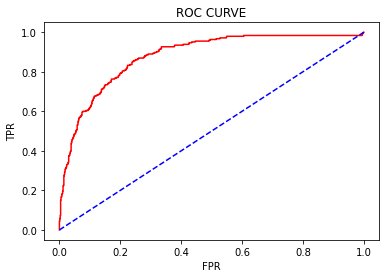

In [74]:
roc_curv(y_test,y_pred_prob)

## Model-II (Balancing the target variable)

In [75]:
#pip install imbalanced-learn --user

In [76]:
#pip install imblearn

In [77]:
from imblearn.over_sampling import RandomOverSampler

In [78]:
ros = RandomOverSampler(random_state=2)

In [79]:
x_sam,y_samp = ros.fit_resample(x,y)

In [80]:
x_sam.shape,y_samp.shape

((7552, 23), (7552,))

In [81]:
y_samp.value_counts()

1    3776
0    3776
Name: Expense, dtype: int64

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x_sam,y_samp,stratify=y_samp,train_size=0.8,random_state=2)

In [83]:
model_2 = sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.423850
         Iterations 24


In [84]:
print(model_2.summary())

                           Logit Regression Results                           
Dep. Variable:                Expense   No. Observations:                 6041
Model:                          Logit   Df Residuals:                     6018
Method:                           MLE   Df Model:                           22
Date:                Sun, 14 Aug 2022   Pseudo R-squ.:                  0.3885
Time:                        21:03:05   Log-Likelihood:                -2560.5
converged:                       True   LL-Null:                       -4187.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                              0.0133      0.003      4.069      0.000       0.007       0.020
education-num                    0.2868      0.016     18.255      0.000     

In [85]:
model_2.aic

5166.959937497806

In [86]:
y_pred_prob = model_2.predict(x_test)

In [87]:
y_pred = [0 if x < 0.5 else 1 for x in y_pred_prob]

In [88]:
validation(y_test,y_pred)

Confusion Matrix
 [[562 194]
 [ 99 656]]
Accuracy 0.8060886829913965
Precison 0.7717647058823529
Recall 0.8688741721854305
F1 Score 0.8174454828660436
Cohen kappa Score 0.6122094678339778
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       756
           1       0.77      0.87      0.82       755

    accuracy                           0.81      1511
   macro avg       0.81      0.81      0.81      1511
weighted avg       0.81      0.81      0.81      1511



AUC: 0.8712148288307229


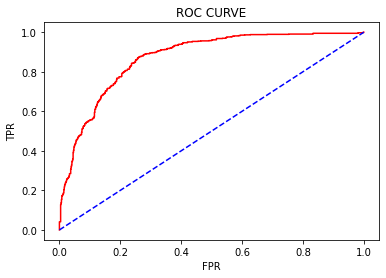

In [89]:
roc_curv(y_test,y_pred_prob)

In [90]:
## AUJUST THE CUT_OFF

In [91]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(model, cutoff):
    y_pred_prob = model.predict(x_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    global score_card
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : roc_auc_score(y_test, y_pred),
                                    'Precision Score':precision_score(y_test, y_pred),
                                    'Recall Score':recall_score(y_test, y_pred),
                                    'Accuracy Score':accuracy_score(y_test, y_pred),
                                    'Kappa Score':cohen_kappa_score(y_test, y_pred),
                                    'f1-score':f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [92]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for value in cutoff:
    update_score_card(model_2, value)

In [93]:
score_card

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.1,0.70303,0.630102,0.981457,0.702846,0.40591,0.767478
1,0.2,0.757244,0.684411,0.953642,0.757114,0.514355,0.796901
2,0.3,0.781029,0.720833,0.916556,0.78094,0.561958,0.806997
3,0.4,0.791599,0.740175,0.898013,0.791529,0.583116,0.81149
4,0.5,0.80613,0.771765,0.868874,0.806089,0.612209,0.817445
5,0.6,0.782242,0.8017,0.749669,0.782263,0.564508,0.774812
6,0.7,0.73915,0.836127,0.594702,0.739246,0.478391,0.695046
7,0.8,0.704681,0.874092,0.478146,0.704831,0.409485,0.618151
8,0.9,0.607298,0.921875,0.234437,0.607545,0.214702,0.373812


In [94]:
score_card=score_card.truncate(after=-1)
for value in cutoff:
    update_score_card(model, value)

In [95]:
score_card

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.1,0.77311,0.70396,0.941722,0.772998,0.546097,0.805666
1,0.2,0.803499,0.758465,0.890066,0.803441,0.606928,0.819013
2,0.3,0.787549,0.794837,0.774834,0.787558,0.575109,0.784708
3,0.4,0.770279,0.844595,0.662252,0.770351,0.540636,0.74239
4,0.5,0.727863,0.878855,0.528477,0.727995,0.455846,0.66005
5,0.6,0.701353,0.910811,0.446358,0.701522,0.402843,0.599111
6,0.7,0.637101,0.929461,0.296689,0.637326,0.274325,0.449799
7,0.8,0.589411,0.94702,0.189404,0.589676,0.178917,0.315673
8,0.9,0.544373,0.958904,0.092715,0.544672,0.0888,0.169082


## TRY OTHER MODELS

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [97]:
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
   
    validation(y_test,y_pred)
    
    y_pred_prob = model.predict_proba(x_test)[:,1]
    
    roc_curv(y_test,y_pred_prob)

KNeighborsClassifier(n_neighbors=3)
Confusion Matrix
 [[544 212]
 [ 62 693]]
Accuracy 0.8186631369953673
Precison 0.7657458563535912
Recall 0.9178807947019868
F1 Score 0.8349397590361447
Cohen kappa Score 0.6373737639155302
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       756
           1       0.77      0.92      0.83       755

    accuracy                           0.82      1511
   macro avg       0.83      0.82      0.82      1511
weighted avg       0.83      0.82      0.82      1511

AUC: 0.8760897368513263


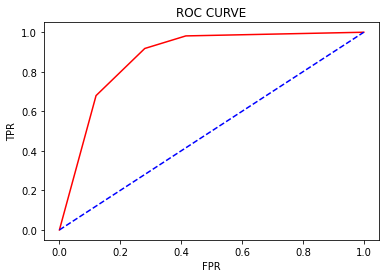

In [99]:
model_results(KNeighborsClassifier(n_neighbors=3),x_train,y_train,x_test,y_test)

GaussianNB()
Confusion Matrix
 [[481 275]
 [ 82 673]]
Accuracy 0.7637326273990734
Precison 0.709915611814346
Recall 0.8913907284768212
F1 Score 0.7903699354081033
Cohen kappa Score 0.5275449243400281
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.64      0.73       756
           1       0.71      0.89      0.79       755

    accuracy                           0.76      1511
   macro avg       0.78      0.76      0.76      1511
weighted avg       0.78      0.76      0.76      1511

AUC: 0.8513612950699043


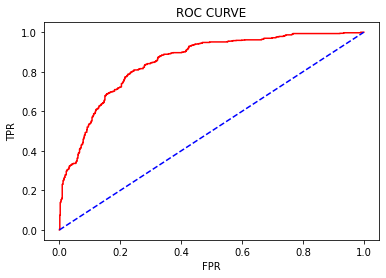

In [100]:
model_results(GaussianNB(),x_train,y_train,x_test,y_test)

DecisionTreeClassifier(max_depth=5)
Confusion Matrix
 [[596 160]
 [124 631]]
Accuracy 0.8120450033090668
Precison 0.797724399494311
Recall 0.8357615894039735
F1 Score 0.8163001293661061
Cohen kappa Score 0.6241016962217807
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       756
           1       0.80      0.84      0.82       755

    accuracy                           0.81      1511
   macro avg       0.81      0.81      0.81      1511
weighted avg       0.81      0.81      0.81      1511

AUC: 0.8737692280738638


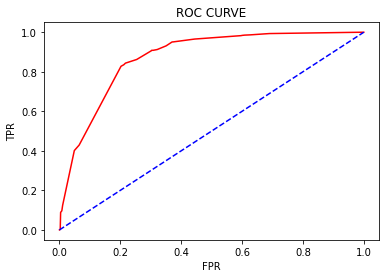

In [101]:
model_results(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)

RandomForestClassifier(max_depth=5, n_estimators=500)
Confusion Matrix
 [[526 230]
 [ 83 672]]
Accuracy 0.7928524156187955
Precison 0.7450110864745011
Recall 0.8900662251655629
F1 Score 0.8111044055522029
Cohen kappa Score 0.5857579921993996
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       756
           1       0.75      0.89      0.81       755

    accuracy                           0.79      1511
   macro avg       0.80      0.79      0.79      1511
weighted avg       0.80      0.79      0.79      1511

AUC: 0.8873830547671607


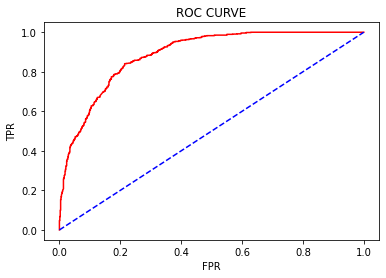

In [106]:
model_results(RandomForestClassifier(n_estimators=500,max_depth=5),x_train,y_train,x_test,y_test)

GradientBoostingClassifier(n_estimators=200)
Confusion Matrix
 [[615 141]
 [ 86 669]]
Accuracy 0.8497683653209794
Precison 0.825925925925926
Recall 0.8860927152317881
F1 Score 0.8549520766773163
Cohen kappa Score 0.6995510745741778
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       756
           1       0.83      0.89      0.85       755

    accuracy                           0.85      1511
   macro avg       0.85      0.85      0.85      1511
weighted avg       0.85      0.85      0.85      1511

AUC: 0.9189862994498756


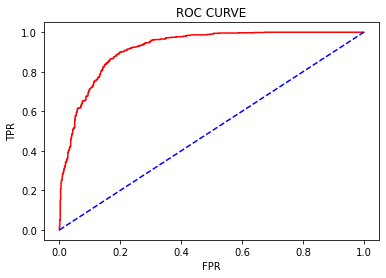

In [107]:
model_results(GradientBoostingClassifier(n_estimators=200),x_train,y_train,x_test,y_test)